# Initialize

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

from glob import glob
from collections import deque

import matplotlib.pyplot as plt
import seaborn as sns
import requests
import pandas as pd
import numpy as np
import os

In [2]:
gp_path = f"{os.getcwd().split('EDA')[0]}\\EDA"
csv_path = f"{os.getcwd().split('EDA')[0]}\\web_crawling"
print(gp_path, csv_path, sep='\n')

c:\Users\NT550-045\Desktop\ml2\\EDA
c:\Users\NT550-045\Desktop\ml2\\web_crawling


In [3]:
raw_path = glob(f'{csv_path}\\**\\raw_*.csv', recursive=True)[0]
tag_path = glob(f'{csv_path}\\**\\tag_*.csv', recursive=True)[0]
print(raw_path, tag_path, sep='\n')

c:\Users\NT550-045\Desktop\ml2\\web_crawling\merge_dataset\raw_merge.csv
c:\Users\NT550-045\Desktop\ml2\\web_crawling\merge_dataset\tag_merge.csv


# Data Load

In [4]:
raw = pd.read_csv(raw_path, sep='\t')
tag = pd.read_csv(tag_path)

## Data Check

### Define check_info

In [5]:
def check_info(df, type_=None):
    column_list = []
    if type_ == 'object':
        for col in df.columns:
            if df[col].dtype == type_:
                print(f'col :{col}\ttype :{df[col].dtype}\tNa :{sum(df[col].isna())}')
                column_list.append(col)
        return column_list
    
    elif type_ == 'int':
        for col in df.columns:
            if df[col].dtype == 'int64' or df[col].dtype == 'int32':
                print(f'col :{col}\ttype :{df[col].dtype}\tNa :{sum(df[col].isna())}')
                column_list.append(col)
        return column_list
    
    elif type_ == 'float':
        for col in df.columns:
            if df[col].dtype == 'float64' or df[col].dtype == 'float34':
                print(f'col :{col}\ttype :{df[col].dtype}\tNa :{sum(df[col].isna())}')
                column_list.append(col)
        return column_list
    
    else:
        for col in df.columns:
            print(f'col :{col}\ttype :{df[col].dtype}\tNa :{sum(df[col].isna())}')
    

### Check Data Info

In [6]:
r_df = raw.copy()

In [7]:
object_col = check_info(r_df, 'object')
print(object_col)

col :genre	type :object	Na :0
col :new_date	type :object	Na :0
col :Review	type :object	Na :0
['genre', 'new_date', 'Review']


In [8]:
int_col = check_info(r_df, 'int')
print(int_col)

col :appid	type :int64	Na :0
col :24_Hour_Peak	type :int64	Na :0
col :All_time_peak	type :int64	Na :0
col :positive	type :int64	Na :0
col :negative	type :int64	Na :0
col :average_forever	type :int64	Na :0
col :average_2weeks	type :int64	Na :0
col :median_forever	type :int64	Na :0
col :median_2weeks	type :int64	Na :0
col :num_lang	type :int64	Na :0
col :is_free	type :int64	Na :0
col :controller_support	type :int64	Na :0
col :metacritic_tf	type :int64	Na :0
col :days_after_release	type :int64	Na :0
['appid', '24_Hour_Peak', 'All_time_peak', 'positive', 'negative', 'average_forever', 'average_2weeks', 'median_forever', 'median_2weeks', 'num_lang', 'is_free', 'controller_support', 'metacritic_tf', 'days_after_release']


In [9]:
float_col = check_info(r_df, 'float')
print(float_col)

col :price	type :float64	Na :0
col :initialprice	type :float64	Na :0
col :required_age	type :float64	Na :0
col :dlc	type :float64	Na :0
col :metacritic	type :float64	Na :45005
col :windows	type :float64	Na :0
col :mac	type :float64	Na :0
col :linux	type :float64	Na :0
col :platforms_num	type :float64	Na :0
col :recommendations	type :float64	Na :0
col :achievements	type :float64	Na :0
['price', 'initialprice', 'required_age', 'dlc', 'metacritic', 'windows', 'mac', 'linux', 'platforms_num', 'recommendations', 'achievements']


### EDA

#### Target Col Preprocessing

```
Positive, Negative, Mixed, Indifference
```

In [10]:
r_df['Review'].value_counts()

Very Positive              7498
Positive                   6950
Mixed                      6575
Mostly Positive            4701
1 user reviews             3706
2 user reviews             2908
3 user reviews             2343
4 user reviews             1940
No user reviews            1815
5 user reviews             1669
6 user reviews             1423
7 user reviews             1244
8 user reviews             1100
Mostly Negative             957
9 user reviews              948
Overwhelmingly Positive     270
Negative                    185
Very Negative                17
Overwhelmingly Negative       3
Name: Review, dtype: int64

In [11]:
r_df['Target'] = r_df['Review'].apply(lambda x:'Positive' if 'Positive' in x else x).apply(lambda x:'Negative' if 'Negative' in x else x).apply(lambda x:'No_Interest' if 'user' in x else x)

# r_df['Target'] = r_df['Review'].apply(lambda x:'Positive' if 'Positive' in x else 'Negative')

In [12]:
r_df['Target'].value_counts(normalize=True).values

array([0.41985211, 0.41286863, 0.14215601, 0.02512324])

In [13]:
r_df['Target'].value_counts(normalize=True).keys()

Index(['Positive', 'No_Interest', 'Mixed', 'Negative'], dtype='object')

#### Object Col

In [14]:
r_df['new_date'] = pd.to_datetime(r_df['new_date'])
r_df['year'] = r_df['new_date'].dt.year
r_df['month'] = r_df['new_date'].dt.month

In [15]:
from sklearn.preprocessing import LabelEncoder
scale = LabelEncoder()
r_df['Target_'] = scale.fit_transform(r_df['Target'])

#### Na Processing

In [16]:
r_df['metacritic'] = r_df['metacritic'].fillna(0)

#### Drop Col

In [17]:
r_df = r_df.drop(['genre','new_date'], axis=1)

In [18]:
r_df.to_csv('./pre_data2.csv', index=False)

#### Int Col

In [19]:
int_col = check_info(r_df, 'int')

# appid, target del
int_col = int_col[1:-1]
print(len(int_col))

col :appid	type :int64	Na :0
col :24_Hour_Peak	type :int64	Na :0
col :All_time_peak	type :int64	Na :0
col :positive	type :int64	Na :0
col :negative	type :int64	Na :0
col :average_forever	type :int64	Na :0
col :average_2weeks	type :int64	Na :0
col :median_forever	type :int64	Na :0
col :median_2weeks	type :int64	Na :0
col :num_lang	type :int64	Na :0
col :is_free	type :int64	Na :0
col :controller_support	type :int64	Na :0
col :metacritic_tf	type :int64	Na :0
col :days_after_release	type :int64	Na :0
col :year	type :int64	Na :0
col :month	type :int64	Na :0
col :Target_	type :int32	Na :0
15


In [20]:
r_df[int_col].describe()

,24_Hour_Peak,All_time_peak,positive,negative,average_forever,average_2weeks,median_forever,median_2weeks,num_lang,is_free,controller_support,metacritic_tf,days_after_release,year,month
count,46252.000000,4.625200e+04,46252.000000,46252.000000,46252.000000,46252.000000,46252.000000,46252.000000,46252.000000,46252.000000,46252.000000,46252.000000,46252.000000,46252.000000,46252.000000
mean,68.137118,6.508497e+02,749.455569,132.672295,109.782993,7.580429,97.879767,8.404004,4.880308,0.184230,0.197289,0.026961,954.674933,2020.248378,6.717158
std,2705.008916,1.324747e+04,10388.907605,2057.176731,1337.555910,137.046019,1365.108579,151.662843,7.785498,0.387676,0.397956,0.161971,529.189863,1.414356,3.420182
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,139.000000,2018.000000,1.000000
25%,0.000000,0.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,496.000000,2019.000000,4.000000
50%,0.000000,0.000000e+00,10.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,898.000000,2020.000000,7.000000
75%,0.000000,4.000000e+00,45.000000,12.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,1394.000000,2022.000000,10.000000
max,513618.000000,1.324761e+06,798795.000000,143347.000000,178059.000000,11043.000000,178106.000000,11043.000000,49.000000,1.000000,1.000000,1.000000,1964.000000,2022.000000,12.000000


In [21]:
plt.rcParams['figure.dpi'] = 300

In [22]:
from scipy import stats

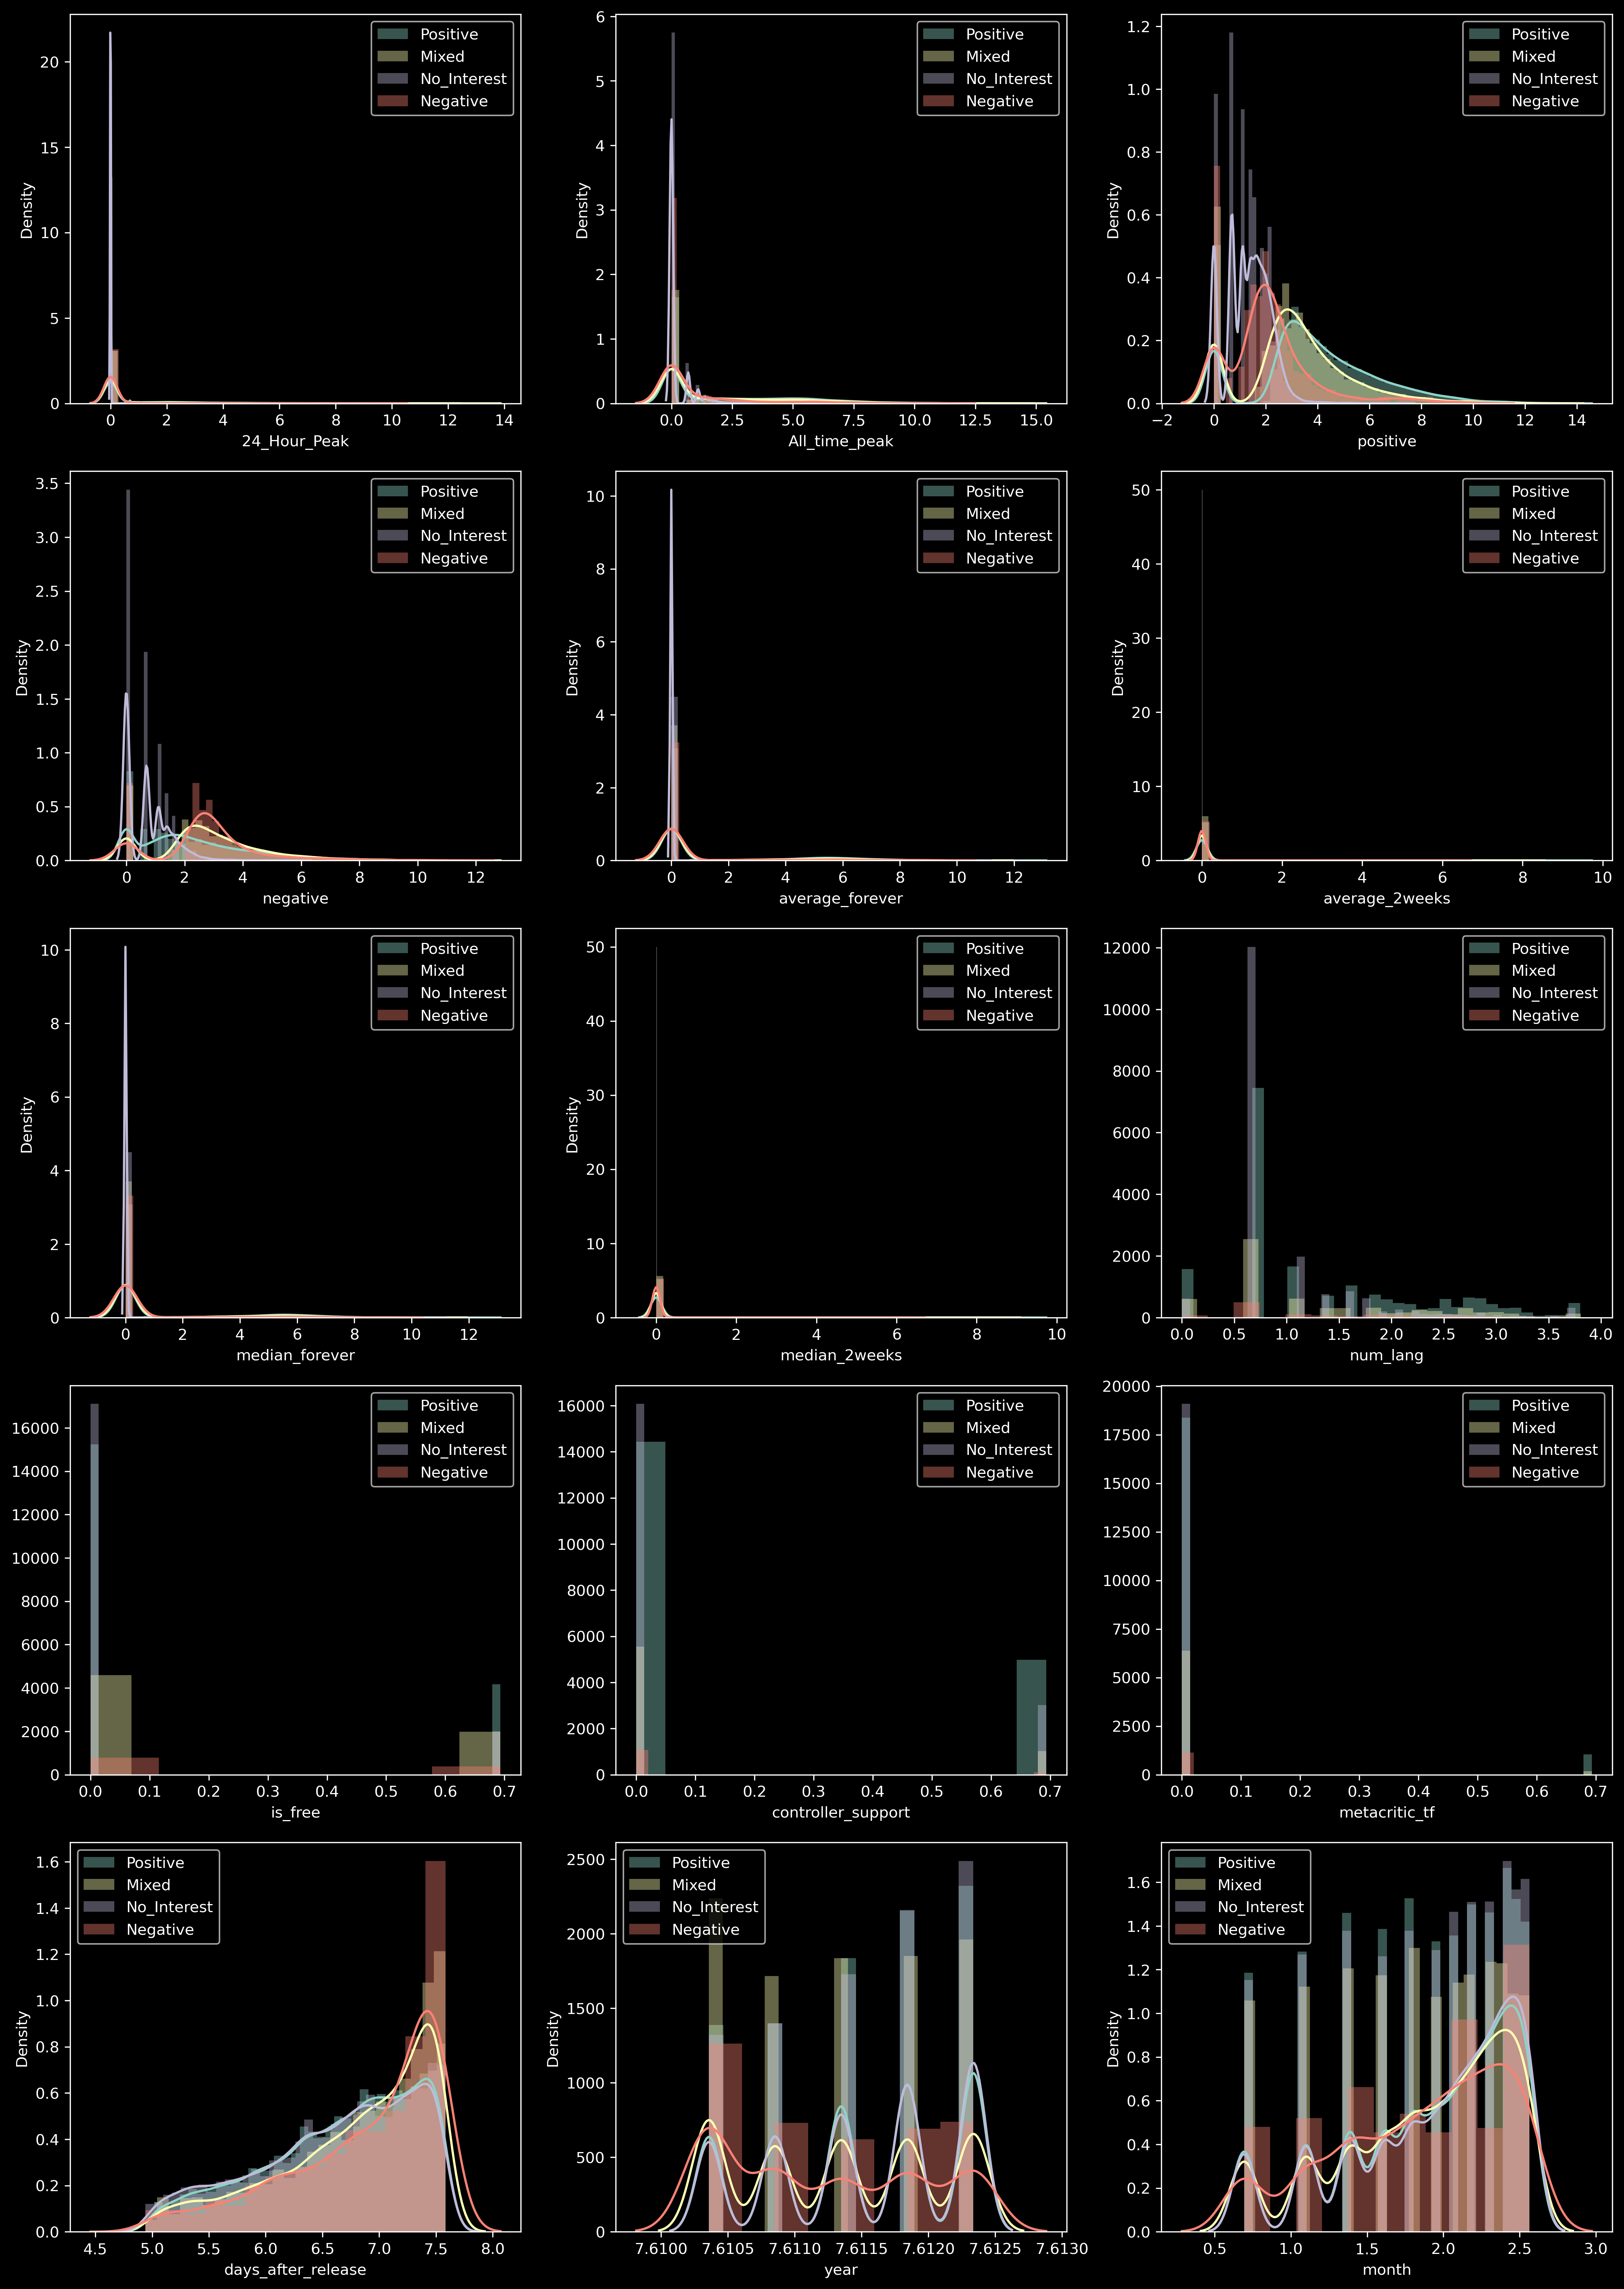

In [23]:
plt.style.use(['dark_background'])

for i in range(0, len(int_col)):
    plt.subplot(5,3,i+1)
    for target in r_df['Target'].unique():
        
        if int_col[i] in ['num_lang', 'is_free', 'controller_support', 'metacritic_tf']:
            sns.distplot(np.log(r_df[r_df['Target'] == target].loc[:,int_col[i]] + 1), label=target, kde=False)
        else:
            sns.distplot(np.log(r_df[r_df['Target'] == target].loc[:,int_col[i]] + 1), label=target)

        # if int_col[i] in ['num_lang', 'is_free', 'controller_support', 'metacritic_tf']:
        #     try:
        #         sns.distplot(stats.boxcox(r_df[r_df['Target'] == target].loc[:,int_col[i]] + 1)[0], label=target, kde=False)
        #     except:
        #         sns.distplot(r_df[r_df['Target'] == target].loc[:,int_col[i]], label=target, kde=False)
        # else:
        #     try:
        #         sns.distplot(stats.boxcox(r_df[r_df['Target'] == target].loc[:,int_col[i]] + 1)[0], label=target)
            
        #     except:
        #         sns.distplot(r_df[r_df['Target'] == target].loc[:,int_col[i]], label=target, kde=False)
        
    plt.legend()
plt.gcf().set_size_inches(15,21)
plt.tight_layout()
plt.show()

In [24]:
r_df.iloc[:,1:].groupby('Target').mean().T

Target,Mixed,Negative,No_Interest,Positive
24_Hour_Peak,176.732776,24.265060,0.023565,100.973995
All_time_peak,1269.157871,375.196213,1.245025,1096.793553
positive,604.554373,188.802065,4.836091,1564.299706
negative,306.835133,238.098107,2.146366,195.749575
average_forever,138.212471,85.814974,4.194700,205.423400
average_2weeks,6.866008,1.581756,0.000000,15.635615
median_forever,121.971559,77.562823,4.211301,183.048818
median_2weeks,8.279392,1.468158,0.000000,17.125444
price,7.361682,6.638778,5.606749,8.171114
initialprice,7.926567,6.966635,5.792412,8.886164


#### Float Col

In [25]:
float_col = check_info(r_df, 'float')

print(len(float_col))

col :price	type :float64	Na :0
col :initialprice	type :float64	Na :0
col :required_age	type :float64	Na :0
col :dlc	type :float64	Na :0
col :metacritic	type :float64	Na :0
col :windows	type :float64	Na :0
col :mac	type :float64	Na :0
col :linux	type :float64	Na :0
col :platforms_num	type :float64	Na :0
col :recommendations	type :float64	Na :0
col :achievements	type :float64	Na :0
11


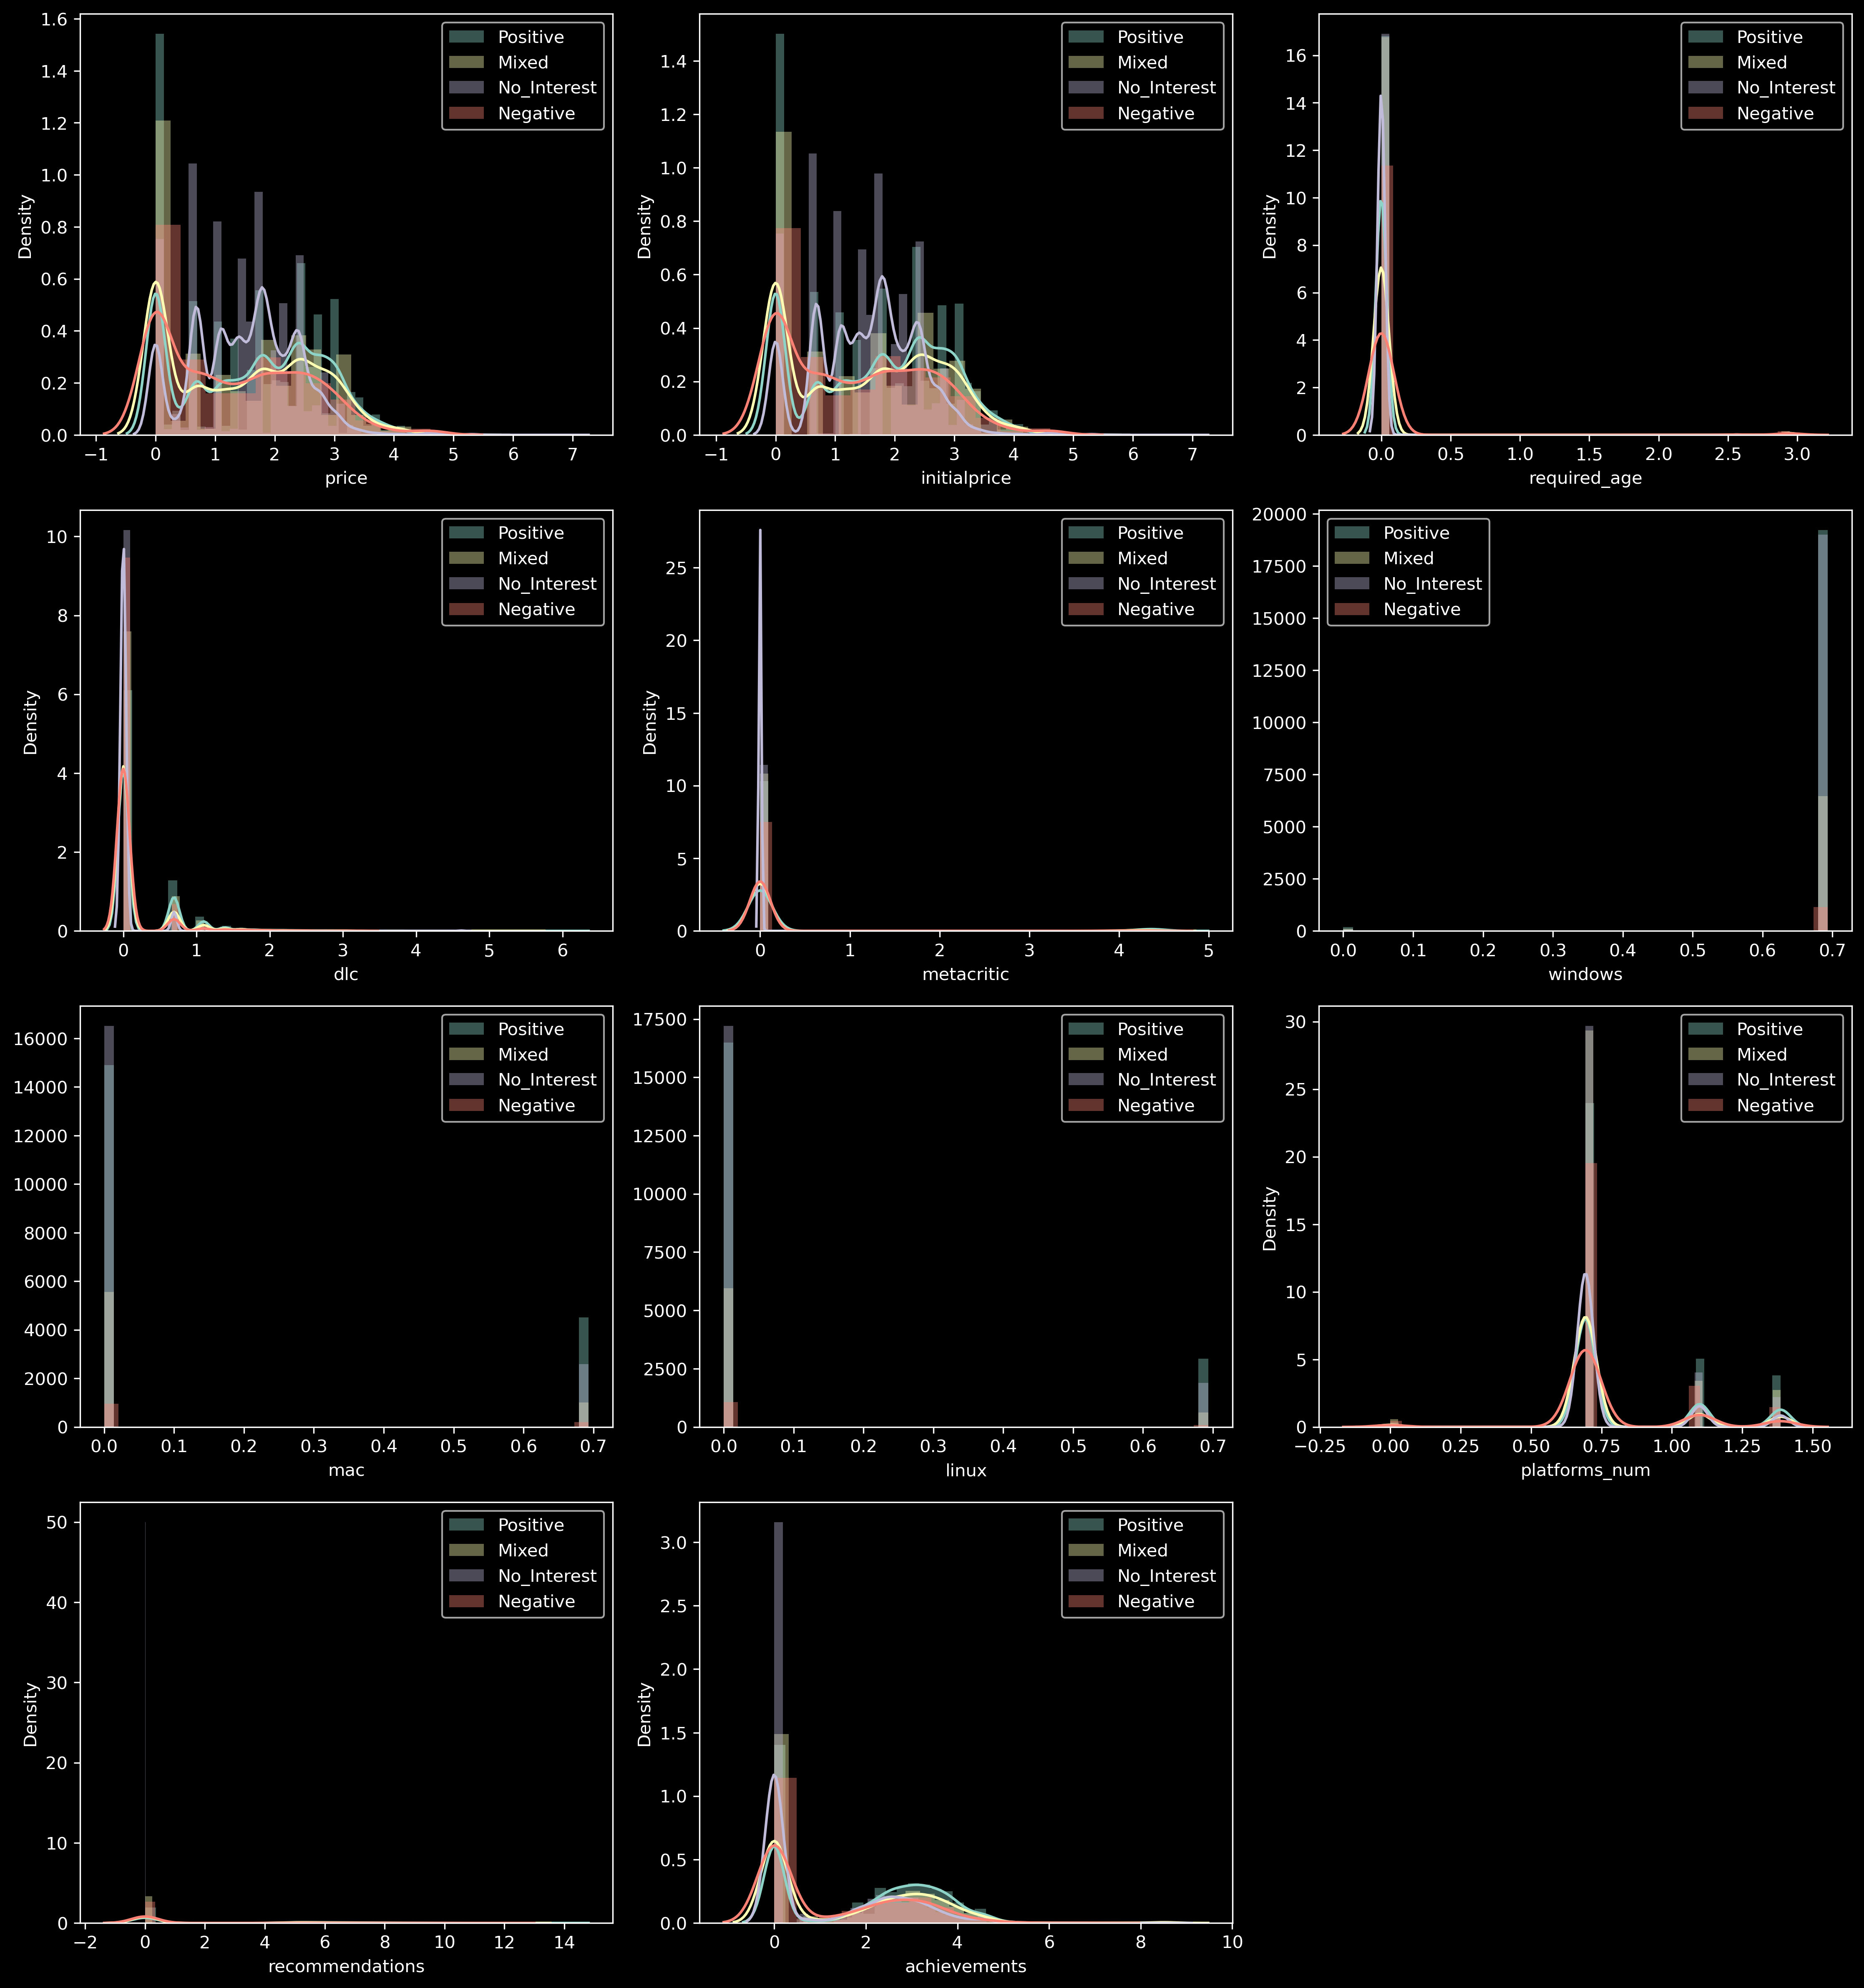

In [26]:
for i in range(0, len(float_col)):
    plt.subplot(4,3,i+1)
    for target in r_df['Target'].unique():
        
        if float_col[i] in ['windows', 'mac', 'linux', 'platforms_nums']:
            sns.distplot(np.log(r_df[r_df['Target'] == target].loc[:,float_col[i]] + 1), label=target, kde=False)
        else:
            sns.distplot(np.log(r_df[r_df['Target'] == target].loc[:,float_col[i]] + 1), label=target)        

    plt.legend()
plt.gcf().set_size_inches(15,16)
plt.tight_layout()
plt.show()

In [28]:
r_df['controller_support'].value_counts()

0    37127
1     9125
Name: controller_support, dtype: int64